In [1]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
from pandas import Series,DataFrame
import statsmodels
import statsmodels.api as sm
import statsmodels.formula.api as smf
import scipy.stats
import scipy.optimize
import scipy.spatial
from IPython import display
from ipywidgets import interact ,widgets
import scipy.stats as stats
import math

In [2]:
from sklearn.datasets import load_iris

In [3]:
iris=load_iris()

In [4]:
X=iris.data
y=iris.target

In [5]:
from sklearn.model_selection import train_test_split

In [6]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.30)

# LOGISTIC REGRESSION #

In [7]:
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression()

In [8]:
lr.fit(X_train,y_train)

D:\anaconda\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
D:\anaconda\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [9]:
lr.score(X_test,y_test)

0.9333333333333333

In [10]:
y_predicted=lr.predict(X_test)
from sklearn.metrics import confusion_matrix

In [11]:
cm=confusion_matrix(y_test,y_predicted)

In [12]:
cm

array([[17,  0,  0],
       [ 0, 10,  2],
       [ 0,  1, 15]], dtype=int64)

In [13]:
FP = cm.sum(axis=0) - np.diag(cm)  
FN = cm.sum(axis=1) - np.diag(cm)
TP = np.diag(cm)
TN = cm.sum() - (FP + FN + TP)

# Sensitivity, hit rate, recall, or true positive rate
TPR = TP/(TP+FN)
# Specificity or true negative rate
TNR = TN/(TN+FP) 
# Precision or positive predictive value
PPV = TP/(TP+FP)
# Negative predictive value
NPV = TN/(TN+FN)
# Fall out or false positive rate
FPR = FP/(FP+TN)
# False negative rate
FNR = FN/(TP+FN)
# False discovery rate
FDR = FP/(TP+FP)

# Overall accuracy
ACC = (TP+TN)/(TP+FP+FN+TN)
print(FP,FN,TP,TN)

[0 1 2] [0 2 1] [17 10 15] [28 32 27]


In [14]:
n=len(FP)

In [15]:
M=[]
for i in range(0,n):
    M.append(FP[i]+TP[i])
print(M)

[17, 11, 17]


In [16]:
d=pd.DataFrame(M,columns=['logisticreg'])

In [17]:
d

,logisticreg
0,17
1,11
2,17


In [18]:
d01=pd.DataFrame(FP,columns=['logisticregfp'])

In [19]:
d02=pd.DataFrame(TP,columns=['logisticregtp'])

# DECISION  TREE #

In [20]:
from sklearn import tree
model=tree.DecisionTreeClassifier()

In [21]:
model.fit(X_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [22]:
model.score(X_test,y_test)

0.9111111111111111

In [23]:
y_predicted=model.predict(X_test)

In [24]:
cm=confusion_matrix(y_test,y_predicted)

In [25]:
cm

array([[17,  0,  0],
       [ 0, 11,  1],
       [ 0,  3, 13]], dtype=int64)

In [26]:
FP = cm.sum(axis=0) - np.diag(cm)  
FN = cm.sum(axis=1) - np.diag(cm)
TP = np.diag(cm)
TN = cm.sum() - (FP + FN + TP)

# Sensitivity, hit rate, recall, or true positive rate
TPR = TP/(TP+FN)
# Specificity or true negative rate
TNR = TN/(TN+FP) 
# Precision or positive predictive value
PPV = TP/(TP+FP)
# Negative predictive value
NPV = TN/(TN+FN)
# Fall out or false positive rate
FPR = FP/(FP+TN)
# False negative rate
FNR = FN/(TP+FN)
# False discovery rate
FDR = FP/(TP+FP)

# Overall accuracy
ACC = (TP+TN)/(TP+FP+FN+TN)
print(FP,FN,TP,TN)

[0 3 1] [0 1 3] [17 11 13] [28 30 28]


In [27]:
n=len(FP)

In [28]:
M=[]
for i in range(0,n):
    M.append(FP[i]+TP[i])
print(M)

[17, 14, 14]


In [29]:
d1=pd.DataFrame(M,columns=['decisiontree'])

In [30]:
d11=pd.DataFrame(FP,columns=['decisiontreefp'])

In [31]:
d12=pd.DataFrame(TP,columns=['decisiontreetp'])

# KNN(5) #

In [32]:
from sklearn.neighbors import KNeighborsClassifier

In [33]:
knn=KNeighborsClassifier(n_neighbors=5)

In [34]:
knn.fit(X_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=5, p=2,
           weights='uniform')

In [35]:
knn.score(X_test,y_test)

0.9777777777777777

In [36]:
y_predicted=knn.predict(X_test)

In [37]:
cm=confusion_matrix(y_test,y_predicted)

In [38]:
cm

array([[17,  0,  0],
       [ 0, 11,  1],
       [ 0,  0, 16]], dtype=int64)

In [39]:
FP = cm.sum(axis=0) - np.diag(cm)  
FN = cm.sum(axis=1) - np.diag(cm)
TP = np.diag(cm)
TN = cm.sum() - (FP + FN + TP)

# Sensitivity, hit rate, recall, or true positive rate
TPR = TP/(TP+FN)
# Specificity or true negative rate
TNR = TN/(TN+FP) 
# Precision or positive predictive value
PPV = TP/(TP+FP)
# Negative predictive value
NPV = TN/(TN+FN)
# Fall out or false positive rate
FPR = FP/(FP+TN)
# False negative rate
FNR = FN/(TP+FN)
# False discovery rate
FDR = FP/(TP+FP)

# Overall accuracy
ACC = (TP+TN)/(TP+FP+FN+TN)
print(FP,FN,TP,TN)

[0 0 1] [0 1 0] [17 11 16] [28 33 28]


In [40]:
n=len(FP)

In [41]:
M=[]
for i in range(0,n):
    M.append(FP[i]+TP[i])
print(M)

[17, 11, 17]


In [42]:
d2=pd.DataFrame(M,columns=['knn'])

In [43]:
d21=pd.DataFrame(FP,columns=['knnfp'])

In [44]:
d22=pd.DataFrame(TP,columns=['knntp'])

# ONE WAY ANOVA TEST #

In [45]:
f,p= stats.f_oneway(d['logisticreg'],d1['decisiontree'],d2['knn'])

In [46]:
f,p

(0.0, 1.0)

In [47]:
alpha=float(input("enter the significance value"))
if(p<alpha):
    print("reject the null hypothesis")
else:
    print("reject alternate hypothesis")

enter the significance value0.05
reject alternate hypothesis


# MANOVA TEST (BIVARIATE) #

In [48]:
import pandas as pd
import seaborn as sns

In [49]:
d=pd.read_csv("E:/iris.csv")
d

,values,logisticreg,decisiontree,knn5
0,fp,0,0,0
1,fp,1,3,0
2,fp,2,1,1
3,tp,17,17,17
4,tp,10,11,11
5,tp,15,13,16


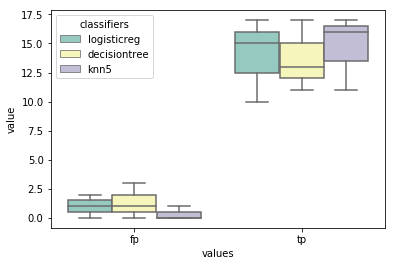

In [51]:
d_melt = pd.melt(d, id_vars=['values'], value_vars=['logisticreg', 'decisiontree', 'knn5'])
# replace column names
d_melt.columns = ['values', 'classifiers', 'value']
# generate a boxplot to see the data distribution by genotypes and years. Using boxplot, we can easily detect the 
# differences between different groups
sns.boxplot(x="values", y="value", hue="classifiers", data=d_melt, palette="Set3")

In [52]:
import statsmodels.api as sm
from statsmodels.formula.api import ols

In [53]:
model = ols('value ~ C(values) + C(classifiers) + C(values):C(classifiers)', data=d_melt).fit()

In [54]:
anova_table = sm.stats.anova_lm(model, typ=2)

In [55]:
anova_table

,sum_sq,df,F,PR(>F)
C(values),7.867222e+02,1.0,1.299174e+02,8.561367e-08
C(classifiers),3.916842e-29,2.0,3.234090e-30,1.000000e+00
C(values):C(classifiers),3.111111e+00,2.0,2.568807e-01,7.776071e-01
Residual,7.266667e+01,12.0,NaN,NaN
